<a href="https://colab.research.google.com/github/amberyliang/Prediction_of_house_price_in_Boston/blob/main/Prediction_of_house_price_in_Boston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

載入資料集

In [11]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [13]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
print(data.shape)
print(target.shape)

(506, 13)
(506,)


檢查缺失值的總數

In [14]:
np.isnan(data).sum()

0

# 線性回歸

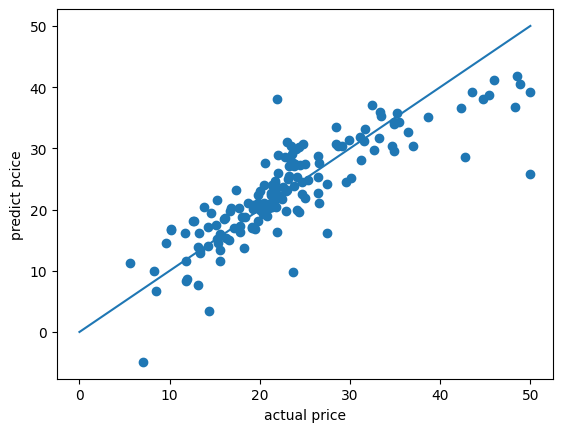

模型準確率: 0.7468604695691605
r-squared: 0.6798574554216328
Regression 預測結果: [14.53207535 41.89890472 23.83977253 25.09608521 30.41676102 36.60574425
 16.04546029 20.21284365 29.6029813  30.30096374 25.73408967 38.65501165
 18.06271073 30.1869617  27.19973639 13.4042616  38.00508097 35.18129355
 19.27337337 21.00733512 23.64283233 18.42631478 17.01559289 16.4099064
 27.38091554 21.87060044 24.53488956 19.91874196 17.15663041 28.83418186
 23.25386975 20.07540481 17.51039425 30.71101208 28.61705439 25.2573605
 16.23813248 11.26603976 13.70138445 15.2833674  17.23453951 13.87297551
 21.62117443 16.15477674 20.43834261 16.82360082 33.17694183 23.98037175
 25.41915859 31.04315211  9.85215592 -4.89375668 27.49811631 23.07549938
 22.9655863  21.04837609 41.11898137 39.20687149  6.63175877 20.37327554
 16.1216476  33.96471044 30.63093829 35.83352895 15.12120807 24.94366477
  7.67530771 37.12777745 16.59649226 27.12624487 18.0961071  25.99954805
 21.70274984 18.66036345 31.7800418  27.10326053 19.3

In [15]:
from sklearn.linear_model import LinearRegression, Lasso # 引入Lasso
from sklearn.linear_model import LinearRegression # 引入LinearRegression
from sklearn.model_selection import train_test_split # 引入train_test_split
import matplotlib.pyplot as plt # 引入pyplot
from sklearn.preprocessing import StandardScaler

x = data # 13個特徵的數據
y = target # 房價數據

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 83) # 將數據分成73比

std_tool = StandardScaler()
x_train = std_tool.fit_transform(x_train) # 將資料標準化

lnregr = LinearRegression()
lnregr.fit(x_train, y_train) # 將資料拿去訓練

x_test = std_tool.transform(x_test)
y_predict = lnregr.predict(x_test) # 北test的資料用訓練出來的模型去預測

# define and fit the lasso object
lasso = Lasso()
lasso.fit(x_train, y_train)

plt.xlabel("actual price") # x軸的標題
plt.ylabel("predict pcice") # y軸的標題
plt.plot([0,50], [0,50]) # 劃一條基準線
plt.scatter(y_test, y_predict) # 比對預測跟實際的差別
plt.show() # 察看結果
score=lnregr.score(x_train, y_train) #訓練模型的正確率
r_squared = lasso.score(x_test, y_test)
print("模型準確率:", score)
print("r-squared:",r_squared)
print("Regression 預測結果:", y_predict)

# **正則化方法**
L1 正則項（ Lasso ）

In [16]:
from sklearn.linear_model import Lasso

In [17]:
lr = Lasso(alpha = 0.001)

In [18]:
lr.fit(x_train, y_train)

Lasso(alpha=0.001)

In [19]:
train_score = lr.score(x_train,y_train)
test_score = lr.score(x_test,y_test)
coeff_used = np.sum(lr.coef_!=0)

print("training score for alpha=0.001",train_score)
print("test score for alpha=0.001",test_score)
print("number of features used:",coeff_used)

training score for alpha=0.001 0.7468595499731014
test score for alpha=0.001 0.7130806184258107
number of features used: 13


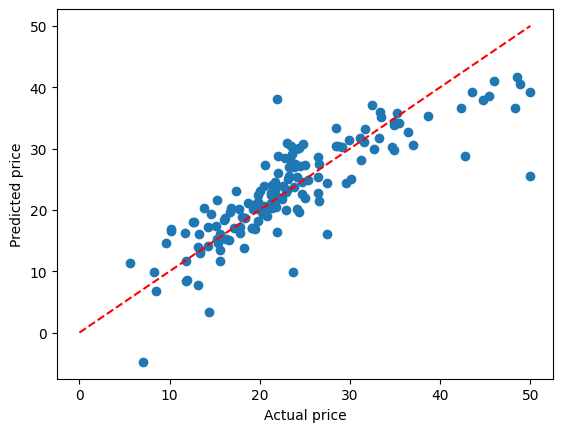

模型準確率: 0.7468604695691605
R-squared: 0.7146188507880482
Lasso 預測結果: [14.6385543  41.7053676  23.77560254 24.96856138 30.49697994 36.6681519
 16.14133828 20.19558387 29.71270034 30.20868226 25.60706515 38.54070729
 18.06709746 30.04819567 27.18190733 13.42887328 38.05010436 35.25277763
 19.35313413 21.09999775 23.92132763 18.31677436 16.97231772 16.33469164
 27.37306949 21.87147401 24.58604588 20.12131378 17.05380246 28.77292118
 23.16471153 20.08665687 17.45483959 30.6948619  28.7663403  25.35520453
 16.25815517 11.2947435  13.81509192 15.28540527 17.2475188  13.9151723
 21.69694933 16.01040641 20.53552312 16.88533932 33.12719377 24.00783668
 25.46649664 30.89888446  9.93041989 -4.78212272 27.50310932 23.05756179
 22.95338262 21.31450538 41.04542949 39.18731379  6.72949669 20.360255
 16.03220452 33.91142119 30.49616151 35.81027284 15.18496786 24.97271057
  7.79796701 37.04276044 16.57268976 27.03391916 18.11486817 26.0089508
 21.73780236 18.68127111 31.79505787 27.00757747 19.30480727 

In [20]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
import numpy as np

# 加載波士頓房價數據集

x = data  # 13個特徵的數據
y = target  # 房價數據

# 將數據集分成訓練集和測試集
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=83)

# 對特徵進行標準化
std_tool = StandardScaler()
x_train = std_tool.fit_transform(x_train)  # 將訓練數據標準化
x_test = std_tool.transform(x_test)  # 將測試數據標準化

# 使用Lasso迴歸模型
alpha = 0.01  # 正規化參數
lasso = Lasso(alpha=alpha)
lasso.fit(x_train, y_train)  # 將資料拿去訓練

# 預測測試集
y_predict = lasso.predict(x_test)  # 用訓練出來的模型去預測

# 繪製預測結果
plt.xlabel("Actual price")  # x軸的標題
plt.ylabel("Predicted price")  # y軸的標題
plt.plot([0, 50], [0, 50], color='red', linestyle='--')  # 劃一條基準線
plt.scatter(y_test, y_predict)  # 比對預測跟實際的差別
plt.show()  # 察看結果

# 計算模型的R²
r_squared = lasso.score(x_test, y_test)
score_2=lnregr.score(x_train, y_train) #訓練模型的正確率
print("模型準確率:", score_2)
print("R-squared:", r_squared)
print("Lasso 預測結果:", y_predict)




L2正則項(Ridge)


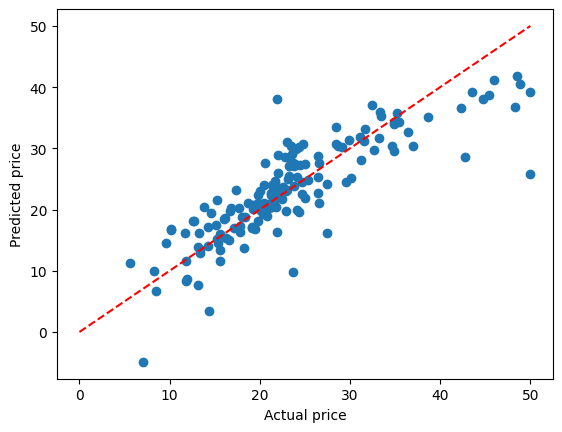

模型準確率: 0.7468604695691605
R-squared (Ridge): 0.7129105312903974
Ridge 預測結果: [14.6385543  41.7053676  23.77560254 24.96856138 30.49697994 36.6681519
 16.14133828 20.19558387 29.71270034 30.20868226 25.60706515 38.54070729
 18.06709746 30.04819567 27.18190733 13.42887328 38.05010436 35.25277763
 19.35313413 21.09999775 23.92132763 18.31677436 16.97231772 16.33469164
 27.37306949 21.87147401 24.58604588 20.12131378 17.05380246 28.77292118
 23.16471153 20.08665687 17.45483959 30.6948619  28.7663403  25.35520453
 16.25815517 11.2947435  13.81509192 15.28540527 17.2475188  13.9151723
 21.69694933 16.01040641 20.53552312 16.88533932 33.12719377 24.00783668
 25.46649664 30.89888446  9.93041989 -4.78212272 27.50310932 23.05756179
 22.95338262 21.31450538 41.04542949 39.18731379  6.72949669 20.360255
 16.03220452 33.91142119 30.49616151 35.81027284 15.18496786 24.97271057
  7.79796701 37.04276044 16.57268976 27.03391916 18.11486817 26.0089508
 21.73780236 18.68127111 31.79505787 27.00757747 19.3

In [21]:
from sklearn.linear_model import Ridge

# 使用Ridge迴歸模型
alpha=0.01
ridge = Ridge(alpha=alpha)
ridge.fit(x_train, y_train)  # 將資料拿去訓練

# 預測測試集
y_predict_ridge = ridge.predict(x_test)  # 用訓練出來的模型去預測

# 繪製預測結果
plt.xlabel("Actual price")  # x軸的標題
plt.ylabel("Predicted price")  # y軸的標題
plt.plot([0, 50], [0, 50], color='red', linestyle='--')  # 劃一條基準線
plt.scatter(y_test, y_predict_ridge)  # 比對預測跟實際的差別
plt.show()  # 察看結果

# 計算模型的R²
r_squared_ridge = ridge.score(x_test, y_test)
score=lnregr.score(x_train, y_train) #訓練模型的正確率
print("模型準確率:", score)
print("R-squared (Ridge):", r_squared_ridge)
print("Ridge 預測結果:", y_predict)
